In [1]:
import json
import numpy as np
import pandas as pd

from nlp.sentiment import get_sentiment
from sklearn.feature_extraction.text import TfidfVectorizer
from nlp.topic_modelling import TopicModelling

from nlp.preprocessing import clean

import seaborn as sns
%matplotlib inline


# Load the Dataset

In [2]:
sofia_airbnb = pd.read_csv("../data/sofia_airbnb_reviews.csv")

In [3]:
sofia_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
lat               306 non-null float64
long              306 non-null float64
reviews           306 non-null object
sentiments        306 non-null object
mean_sentiment    306 non-null float64
dtypes: float64(3), object(2)
memory usage: 12.0+ KB


***

# Quick stats

In [4]:
sofia_airbnb.head()

,lat,long,reviews,sentiments,mean_sentiment
0,42.697323,23.318125,"[""Great apartment with the perfect location if...","[0.45583333333333337, 0.2804761904761905, 0.40...",0.454853
1,42.690397,23.327108,"[""This apartment is absolutely AMAZING! Everyt...","[0.6023809523809524, 1.0, 0.625, 0.8, 0.399999...",0.411689
2,42.692549,23.307022,"[""The place is really stylish and cozy. Hosts ...","[0.29444444444444445, 0.263, 0.339259259259259...",0.161913
3,42.690125,23.322050,"[""We stayed for two nights and everything was ...","[0.2898148148148148, 0.5707407407407408, 0.397...",0.336324
4,42.692787,23.330109,"[""One of the best locations in Sofia!"", ""Centr...","[1.0, 0.3333333333333333, 0.5028571428571429, ...",0.341235


In [5]:
sofia_airbnb.describe()

,lat,long,mean_sentiment
count,306.000000,306.000000,306.000000
mean,42.692683,23.323903,0.372832
std,0.010008,0.015763,0.054759
min,42.647482,23.253589,0.138154
25%,42.689313,23.317093,0.341861
50%,42.693428,23.322385,0.373597
75%,42.699408,23.330179,0.403898
max,42.711740,23.380464,0.601389


***

# Exploring the reviews

## Remove NaN and redundant reviews

In [6]:
sofia_airbnb.dropna(inplace=True)
sofia_airbnb.reset_index(inplace=True)
sofia_airbnb.drop("index", axis=1, inplace=True)

In [7]:
for i in range(sofia_airbnb.shape[0]):
    try:
        json.loads(sofia_airbnb["reviews"][i])
    except json.JSONDecodeError:
        sofia_airbnb.drop(i, axis=0, inplace=True)

## Sentiment Analysis

### Quaintitative

In [8]:
sentiments = []
mean_sentiment = []

for i in range(sofia_airbnb.shape[0]):
    scores = []
    for review in json.loads(sofia_airbnb["reviews"][i]):
        scores.append(get_sentiment(review))     
        
    sentiments.append(scores)
    mean_sentiment.append(np.mean(scores))
    
sofia_airbnb["sentiments"] = sentiments
sofia_airbnb["mean_sentiment"] = mean_sentiment

/Users/victor/.local/share/virtualenvs/Peper-Analysis-eBzTI8A5/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


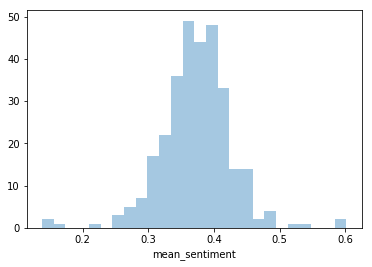

In [9]:
sns.distplot(sofia_airbnb["mean_sentiment"], kde=False);

### Save the `mean_sentiment`s to `JSON`

In [10]:
jsonArray = ''
for index, row in sofia_airbnb.iterrows():
    x = {
       "lat": row["lat"],
       "long": row["long"],
       "mean_sentiment": row["mean_sentiment"]
    }
    jsonArray += json.dumps(x)+','

## Topic Modelling

In [11]:
for loc in sofia_airbnb.values:
    reviews = json.loads(loc[2])
    for review in reviews:
        print(TopicModelling(review).get_topics())
        

Modelling...
[['downtown', 'perfect', 'something'], ['need', 'clean', 'anything'], ['need', 'clean', 'anything']]
Modelling...
[['fantastic', 'stay', 'clean'], ['super', 'tony', 'helpful'], ['sofia', 'definitely', 'coming']]
Modelling...
[['close', 'flat', 'really'], ['great', 'flat', 'really'], ['great', 'flat', 'really']]
Modelling...
[['town', 'best', 'tony'], ['u', 'word', 'spot'], ['town', 'best', 'tony']]
Modelling...
[['it', 'recommend', 'share'], ['toilet', 'vitosha', 'share'], ['it', 'recommend', 'share']]
Modelling...
[['nearby', 'coffee', 'making'], ['distance', 'walking', 'short'], ['location', 'pastry', 'excellent']]
Modelling...
[['great', 'go', 'awesome'], ['great', 'tonys', 'everything'], ['great', 'hospitality', 'experience']]
Modelling...
[['pretty', 'room', 'nice'], ['good', 'yard', 'silent'], ['guy', 'thank', 'nice']]
Modelling...
[['rent', 'people', 'place'], ['rent', 'people', 'place'], ['great', 'people', 'place']]
Modelling...
[['close', 'everything', 'nice'], [

KeyboardInterrupt: 

## Term-Frequency x Inverse-Doc-Freq

In [ ]:
for loc in sofia_airbnb.values:
    tf_idf = TfidfVectorizer(use_idf=True, stop_words=stop_words_en)
    X = tf_idf.fit_transform(json.loads(loc[2]))
    
    tfs = np.mean(X.todense(), axis=0) * .1
    scores = np.multiply(tfs, tf_idf.idf_.reshape(tfs.shape))
    
    terms = np.array(tf_idf.get_feature_names()).reshape(tfs.shape)
    zipped = np.hstack((terms.T, scores.T)).tolist()
    print(np.array(sorted(zipped, key=lambda x: x[1], reverse=True)))
    
    print('='*100)
    print('='*100)